In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
 
ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
 
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [1]:
!pip install pennylane
from IPython.display import clear_output
clear_output()

In [ ]:
import os

def restart_runtime():
  os.kill(os.getpid(), 9)
restart_runtime()

In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Loading Raw Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])/255.0
x_test_flatten = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])/255.0

In [4]:
print(x_train_flatten.shape, y_train.shape)
print(x_test_flatten.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [5]:
x_train_0 = x_train_flatten[y_train == 0]
x_train_1 = x_train_flatten[y_train == 1]
x_train_2 = x_train_flatten[y_train == 2]
x_train_3 = x_train_flatten[y_train == 3]
x_train_4 = x_train_flatten[y_train == 4]
x_train_5 = x_train_flatten[y_train == 5]
x_train_6 = x_train_flatten[y_train == 6]
x_train_7 = x_train_flatten[y_train == 7]
x_train_8 = x_train_flatten[y_train == 8]
x_train_9 = x_train_flatten[y_train == 9]

x_train_list = [x_train_0, x_train_1, x_train_2, x_train_3, x_train_4, x_train_5, x_train_6, x_train_7, x_train_8, x_train_9]

print(x_train_0.shape)
print(x_train_1.shape)
print(x_train_2.shape)
print(x_train_3.shape)
print(x_train_4.shape)
print(x_train_5.shape)
print(x_train_6.shape)
print(x_train_7.shape)
print(x_train_8.shape)
print(x_train_9.shape)

(5923, 784)
(6742, 784)
(5958, 784)
(6131, 784)
(5842, 784)
(5421, 784)
(5918, 784)
(6265, 784)
(5851, 784)
(5949, 784)


In [6]:
x_test_0 = x_test_flatten[y_test == 0]
x_test_1 = x_test_flatten[y_test == 1]
x_test_2 = x_test_flatten[y_test == 2]
x_test_3 = x_test_flatten[y_test == 3]
x_test_4 = x_test_flatten[y_test == 4]
x_test_5 = x_test_flatten[y_test == 5]
x_test_6 = x_test_flatten[y_test == 6]
x_test_7 = x_test_flatten[y_test == 7]
x_test_8 = x_test_flatten[y_test == 8]
x_test_9 = x_test_flatten[y_test == 9]

x_test_list = [x_test_0, x_test_1, x_test_2, x_test_3, x_test_4, x_test_5, x_test_6, x_test_7, x_test_8, x_test_9]

print(x_test_0.shape)
print(x_test_1.shape)
print(x_test_2.shape)
print(x_test_3.shape)
print(x_test_4.shape)
print(x_test_5.shape)
print(x_test_6.shape)
print(x_test_7.shape)
print(x_test_8.shape)
print(x_test_9.shape)

(980, 784)
(1135, 784)
(1032, 784)
(1010, 784)
(982, 784)
(892, 784)
(958, 784)
(1028, 784)
(974, 784)
(1009, 784)


# Selecting the dataset

Output: X_train, Y_train, X_test, Y_test

In [7]:
num_sample = 200
n_class = 4
mult_test = 0.25

X_train = x_train_list[0][:num_sample, :]
X_test = x_test_list[0][:int(mult_test*num_sample), :]

Y_train = np.zeros((n_class*X_train.shape[0],), dtype=int)
Y_test = np.zeros((n_class*X_test.shape[0],), dtype=int)

for i in range(n_class-1):
  X_train = np.concatenate((X_train, x_train_list[i+1][:num_sample, :]), axis=0)
  Y_train[num_sample*(i+1):num_sample*(i+2)] = int(i+1)

  X_test = np.concatenate((X_test, x_test_list[i+1][:int(mult_test*num_sample), :]), axis=0)
  Y_test[int(mult_test*num_sample*(i+1)):int(mult_test*num_sample*(i+2))] = int(i+1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(800, 784) (800,)
(200, 784) (200,)


# Dataset Preprocessing (Standardization + PCA)

## Standardization

In [8]:
def normalize(X, use_params=False, params=None):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset
    
    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the 
        mean and standard deviation respectively.
    
    Note:
        You will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. Handle this by setting using `std = 1` for those 
        dimensions when doing normalization.
    """
    if use_params:
        mu = params[0]
        std_filled = [1]
    else:
        mu = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        #std_filled = std.copy()
    #std_filled[std==0] = 1.
    Xbar = (X - mu)/(std + 1e-8)
    return Xbar, mu, std


In [9]:
X_train, mu_train, std_train = normalize(X_train)
X_train.shape, Y_train.shape

((800, 784), (800,))

In [10]:
X_test = (X_test - mu_train)/(std_train + 1e-8)
X_test.shape, Y_test.shape

((200, 784), (200,))

## PCA

In [11]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [12]:
num_component = 18
pca = PCA(n_components=num_component, svd_solver='full')

In [13]:
pca.fit(X_train)

PCA(n_components=18, svd_solver='full')

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.11187049, 0.17426217, 0.22255275, 0.26823812, 0.29848662,
       0.32845008, 0.35463849, 0.37642907, 0.39726625, 0.41665801,
       0.43362531, 0.45000593, 0.46514029, 0.47967233, 0.49309012,
       0.50584068, 0.51819716, 0.53015231])

In [15]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [16]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(800, 18) (800,)
(200, 18) (200,)


## Norm

In [17]:
X_train = (X_train.T / np.sqrt(np.sum(X_train ** 2, -1))).T
X_test = (X_test.T / np.sqrt(np.sum(X_test ** 2, -1))).T

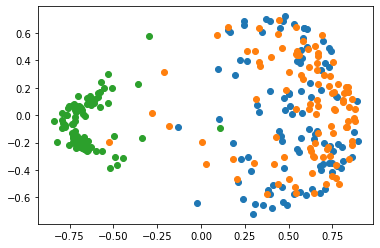

In [18]:
plt.scatter(X_train[:100, 0], X_train[:100, 1])
plt.scatter(X_train[100:200, 0], X_train[100:200, 1])
plt.scatter(X_train[200:300, 0], X_train[200:300, 1])

## Binary Rep

In [19]:
def dec2bin(y_class, n_qubit):
    temp = bin(y_class).replace('b', '')[1:]
    out = np.zeros((n_qubit,))
    
    if len(temp) > n_qubit:
        print("Number of qubit can't be lowered than the binary representation of the class decimal number.")
        return None
    elif len(temp) < n_qubit:
        for i in range(n_qubit-len(temp)):
            temp = '0' + temp
    
    for i in range(len(out)):
        out[i] = temp[i]
        
    return out

In [20]:
Y_train_0 = np.zeros(Y_train.shape)
Y_train_1 = np.zeros(Y_train.shape)

for i in range(len(Y_train)):
        Y_train_0[i] = dec2bin(Y_train[i], 2)[0]
        Y_train_1[i] = dec2bin(Y_train[i], 2)[1]
        
        
    
Y_test_0 = np.zeros(Y_test.shape)
Y_test_1 = np.zeros(Y_test.shape)

for i in range(len(Y_test)):
        Y_test_0[i] = dec2bin(Y_test[i], 2)[0]
        Y_test_1[i] = dec2bin(Y_test[i], 2)[1]

In [21]:
Y_train.shape, Y_test.shape

((800,), (200,))

In [22]:
Y_train_1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

# Quantum

In [23]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer

qml.enable_tape()


# Set a random seed
np.random.seed(42)

In [24]:
# Define output labels as quantum state vectors

# def density_matrix(state):
#     """Calculates the density matrix representation of a state.

#     Args:
#         state (array[complex]): array representing a quantum state vector

#     Returns:
#         dm: (array[complex]): array representing the density matrix
#     """
#     return state * np.conj(state).T


label_0 = [[1], [0]]
label_1 = [[0], [1]]


def density_matrix(state):
    """Calculates the density matrix representation of a state.

    Args:
        state (array[complex]): array representing a quantum state vector

    Returns:
        dm: (array[complex]): array representing the density matrix
    """
    return np.outer(state,  np.conj(state))

state_labels = [label_0, label_1]
#state_labels = np.loadtxt('./tetra_states.txt', dtype=np.complex_)

In [25]:
dm_labels = [density_matrix(state_labels[i]) for i in range(2)]
len(dm_labels)

2

In [26]:
n_qubits = 2
dev_fc = qml.device("default.qubit", wires=n_qubits)


@qml.qnode(dev_fc)
def q_fc(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs = [x, y]
        x (array[float]): 1-d input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    
    # layer iteration
    for l in range(len(params[0])):
        # qubit iteration
        for q in range(n_qubits):
            # gate iteration
            for g in range(int(len(inputs)/3)):
                qml.Rot(*(params[0][l][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params[1][l][3*g:3*(g+1)]), wires=q)
    
    return [qml.expval(qml.Hermitian(dm_labels[i], wires=[i])) for i in range(n_qubits)]


In [27]:
X_train[0].shape

(18,)

In [28]:
a = np.random.uniform(size=(2, 1, 18))

q_fc(a, X_train[0])

tensor([0.89712628, 0.10287372], requires_grad=True)

In [29]:
from keras import backend as K


# Alpha Custom Layer
class class_weights(tf.keras.layers.Layer):
    def __init__(self):
        super(class_weights, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(1, 2), dtype="float32"),
            trainable=True,
        )

    def call(self, inputs):
        return (inputs * self.w)

In [30]:
n_components = 18

X = tf.keras.Input(shape=(n_components,), name='Input_Layer')


# Quantum FC Layer
num_fc_layer = 4
q_fc_layer_0 = qml.qnn.KerasLayer(q_fc, {"params": (2, num_fc_layer, n_components)}, output_dim=2)(X)
q_fc_layer_1 = qml.qnn.KerasLayer(q_fc, {"params": (2, num_fc_layer, n_components)}, output_dim=2)(X)

# Alpha Layer
alpha_layer_0 = class_weights()(q_fc_layer_0)
alpha_layer_1 = class_weights()(q_fc_layer_1)


model_0 = tf.keras.Model(inputs=X, outputs=alpha_layer_0)
model_1 = tf.keras.Model(inputs=X, outputs=alpha_layer_1)

In [31]:
model_0(X_train[0:32]), model_1(X_train[0:32])

(<tf.Tensor: shape=(32, 2), dtype=float32, numpy=
 array([[ 0.00686847, -0.04112648],
        [ 0.00456868, -0.04471522],
        [ 0.00827997, -0.03892388],
        [ 0.00620144, -0.04216736],
        [ 0.01021853, -0.03589883],
        [ 0.01169186, -0.03359975],
        [ 0.00795511, -0.03943082],
        [ 0.01226712, -0.03270208],
        [ 0.01287202, -0.03175816],
        [ 0.00733438, -0.04039944],
        [ 0.01008081, -0.03611374],
        [ 0.01465988, -0.02896827],
        [ 0.01109142, -0.03453672],
        [ 0.01131783, -0.03418341],
        [ 0.0110329 , -0.03462803],
        [ 0.01176252, -0.03348949],
        [ 0.0043194 , -0.04510421],
        [ 0.01130457, -0.03420411],
        [ 0.01004223, -0.03617395],
        [ 0.01076819, -0.03504111],
        [ 0.01032568, -0.03573164],
        [ 0.01255105, -0.03225903],
        [ 0.01309782, -0.03140581],
        [ 0.01487032, -0.02863988],
        [ 0.01384784, -0.03023542],
        [ 0.01318078, -0.03127635],
        [ 0.01

In [32]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=int(len(X_train)/32),
    decay_rate=0.95,
    staircase=True)

In [33]:
for i in range(10):
    print(0.1* ((0.95)**i))

0.1
0.095
0.09025
0.0857375
0.081450625
0.07737809374999999
0.07350918906249998
0.06983372960937498
0.06634204312890622
0.0630249409724609


In [34]:
opt_0 = tf.keras.optimizers.Adam(learning_rate=0.1)
opt_1 = tf.keras.optimizers.Adam(learning_rate=0.1)


model_0.compile(opt_0, loss='mse', metrics=["accuracy"])
model_1.compile(opt_1, loss='mse', metrics=["accuracy"])

In [181]:
cp_val_acc_1 = tf.keras.callbacks.ModelCheckpoint(filepath="./Model/4_1_PCA_QFC_BinRep_val_acc.hdf5",
                monitor='val_accuracy', verbose=1, save_weights_only=True, save_best_only=True, mode='max')

cp_val_loss_1 = tf.keras.callbacks.ModelCheckpoint(filepath="./Model/4_1_PCA_QFC_BinRep_val_loss.hdf5",
                monitor='val_loss', verbose=1, save_weights_only=True, save_best_only=True, mode='min')

In [182]:
H_1 = model_1.fit(X_train, to_categorical(Y_train_1), epochs=10, batch_size=32, initial_epoch=0,
              validation_data=(X_test, to_categorical(Y_test_1)), verbose=1,
              callbacks=[cp_val_acc_1, cp_val_loss_1])

Epoch 1/10
25/25 [==============================] - 1243s 50s/step - loss: 0.3215 - accuracy: 0.6482 - val_loss: 0.1286 - val_accuracy: 0.8700

Epoch 00001: val_accuracy improved from -inf to 0.87000, saving model to ./Model/4_1_PCA_QFC_BinRep_val_acc.hdf5

Epoch 00001: val_loss improved from inf to 0.12862, saving model to ./Model/4_1_PCA_QFC_BinRep_val_loss.hdf5
Epoch 2/10
25/25 [==============================] - 1238s 50s/step - loss: 0.0637 - accuracy: 0.9356 - val_loss: 0.0524 - val_accuracy: 0.9500

Epoch 00002: val_accuracy improved from 0.87000 to 0.95000, saving model to ./Model/4_1_PCA_QFC_BinRep_val_acc.hdf5

Epoch 00002: val_loss improved from 0.12862 to 0.05242, saving model to ./Model/4_1_PCA_QFC_BinRep_val_loss.hdf5
Epoch 3/10
25/25 [==============================] - 1246s 50s/step - loss: 0.0501 - accuracy: 0.9568 - val_loss: 0.0778 - val_accuracy: 0.8900

Epoch 00003: val_accuracy did not improve from 0.95000

Epoch 00003: val_loss did not improve from 0.05242
Epoch 4/

In [183]:
H_1.history

{'loss': [0.21086053550243378,
  0.061439450830221176,
  0.045709751546382904,
  0.052196063101291656,
  0.04152064025402069,
  0.04539689049124718,
  0.0419466495513916,
  0.04617944359779358,
  0.049564946442842484,
  0.04297865927219391],
 'accuracy': [0.7587500214576721,
  0.9350000023841858,
  0.9549999833106995,
  0.9387500286102295,
  0.9624999761581421,
  0.949999988079071,
  0.9649999737739563,
  0.9599999785423279,
  0.9462500214576721,
  0.9574999809265137],
 'val_loss': [0.12861785292625427,
  0.05241711065173149,
  0.07783080637454987,
  0.04948212206363678,
  0.07129299640655518,
  0.043975744396448135,
  0.04480532184243202,
  0.06713776290416718,
  0.0433460995554924,
  0.06146424636244774],
 'val_accuracy': [0.8700000047683716,
  0.949999988079071,
  0.8899999856948853,
  0.949999988079071,
  0.9200000166893005,
  0.9750000238418579,
  0.9399999976158142,
  0.9100000262260437,
  0.9599999785423279,
  0.9350000023841858]}

In [35]:
model_1.load_weights('./Model/4_1_PCA_QFC_BinRep_val_acc.hdf5')

In [36]:
model_1.weights

[<tf.Variable 'model_1/keras_layer_1/params:0' shape=(2, 4, 18) dtype=float32, numpy=
 array([[[-0.26797223,  0.37849617, -1.3049985 ,  1.6538349 ,
          -1.1000731 ,  0.06771134,  0.6043904 , -0.86981314,
          -0.19319023,  1.2196795 ,  1.1196978 ,  0.18507162,
          -0.04155865, -0.00303793,  0.3877537 ,  0.6360989 ,
          -0.21808293, -0.48490873],
         [ 1.2812245 ,  0.93323636,  0.06609938,  2.1107936 ,
          -0.08192353, -0.17687376, -0.36747754, -0.5795907 ,
          -1.2037541 ,  0.49842155,  0.665224  , -0.49293953,
          -0.32925957,  0.7594584 , -0.17794177,  0.3365127 ,
           1.36142   ,  0.4762807 ],
         [-0.41802576,  0.9291733 ,  0.18913125, -1.5472566 ,
           0.67545855, -1.0334672 , -0.36522952, -0.7659326 ,
          -1.9967434 , -0.31721836,  0.45285645, -0.55368996,
           1.6643952 , -0.16335878,  0.64568853,  0.3767126 ,
           0.05206824,  0.18572411],
         [-0.95213246, -0.634032  ,  0.8459088 ,  1.3407633

In [192]:
cp_val_acc_0 = tf.keras.callbacks.ModelCheckpoint(filepath="./Model/4_0_PCA_QFC_BinRep_val_acc.hdf5",
                monitor='val_accuracy', verbose=1, save_weights_only=True, save_best_only=True, mode='max')

cp_val_loss_0 = tf.keras.callbacks.ModelCheckpoint(filepath="./Model/4_0_PCA_QFC_BinRep_val_loss.hdf5",
                monitor='val_loss', verbose=1, save_weights_only=True, save_best_only=True, mode='min')

In [193]:
H_0 = model_0.fit(X_train, to_categorical(Y_train_0), epochs=10, batch_size=32, initial_epoch=0,
              validation_data=(X_test, to_categorical(Y_test_0)), verbose=1,
              callbacks=[cp_val_acc_0, cp_val_loss_0])

Epoch 1/10
25/25 [==============================] - 1253s 50s/step - loss: 0.3447 - accuracy: 0.5437 - val_loss: 0.1208 - val_accuracy: 0.8750

Epoch 00001: val_accuracy improved from -inf to 0.87500, saving model to ./Model/4_0_PCA_QFC_BinRep_val_acc.hdf5

Epoch 00001: val_loss improved from inf to 0.12084, saving model to ./Model/4_0_PCA_QFC_BinRep_val_loss.hdf5
Epoch 2/10
25/25 [==============================] - 1247s 50s/step - loss: 0.1020 - accuracy: 0.8729 - val_loss: 0.0547 - val_accuracy: 0.9600

Epoch 00002: val_accuracy improved from 0.87500 to 0.96000, saving model to ./Model/4_0_PCA_QFC_BinRep_val_acc.hdf5

Epoch 00002: val_loss improved from 0.12084 to 0.05465, saving model to ./Model/4_0_PCA_QFC_BinRep_val_loss.hdf5
Epoch 3/10
25/25 [==============================] - 1283s 51s/step - loss: 0.0597 - accuracy: 0.9315 - val_loss: 0.0449 - val_accuracy: 0.9650

Epoch 00003: val_accuracy improved from 0.96000 to 0.96500, saving model to ./Model/4_0_PCA_QFC_BinRep_val_acc.hdf5

In [194]:
H_0.history

{'loss': [0.26755326986312866,
  0.08774829655885696,
  0.05261080339550972,
  0.04429943487048149,
  0.03726549446582794,
  0.04060828685760498,
  0.04808851331472397,
  0.036371853202581406,
  0.0447818897664547,
  0.056586675345897675],
 'accuracy': [0.6162499785423279,
  0.893750011920929,
  0.9399999976158142,
  0.9574999809265137,
  0.9674999713897705,
  0.9612500071525574,
  0.9524999856948853,
  0.9637500047683716,
  0.9637500047683716,
  0.9437500238418579],
 'val_loss': [0.12084384262561798,
  0.054654818028211594,
  0.044877100735902786,
  0.029224898666143417,
  0.050967611372470856,
  0.06745164096355438,
  0.03398647904396057,
  0.05218568816781044,
  0.055276960134506226,
  0.03998257592320442],
 'val_accuracy': [0.875,
  0.9599999785423279,
  0.9649999737739563,
  0.9900000095367432,
  0.9449999928474426,
  0.949999988079071,
  0.9549999833106995,
  0.9599999785423279,
  0.9649999737739563,
  0.9750000238418579]}

In [37]:
model_0.load_weights('./Model/4_0_PCA_QFC_BinRep_val_acc.hdf5')

In [38]:
model_0.weights

[<tf.Variable 'model/keras_layer/params:0' shape=(2, 4, 18) dtype=float32, numpy=
 array([[[ 0.03721768, -0.45763686, -2.433729  , -0.16519062,
          -1.548132  ,  1.6565139 , -0.77534735,  0.8834767 ,
           0.5066676 , -0.20738466, -0.85952455, -1.0365075 ,
          -0.40144742,  0.35292697,  0.6779325 , -1.2609553 ,
          -0.2542827 ,  0.50904804],
         [ 1.4110111 , -0.87706536, -0.24654704,  0.10550933,
           2.4184365 ,  1.0813566 ,  1.3768635 ,  1.2160602 ,
          -1.2170255 , -0.65251493,  0.5999488 ,  0.11787182,
          -0.6269948 ,  0.77810776,  0.62203467,  0.02974367,
          -0.05936408, -0.57920206],
         [-1.0501962 , -0.19087154,  0.17541106,  0.31082454,
           0.19787166,  0.43145534, -1.8532274 , -0.27889603,
           0.4586927 , -0.8951095 ,  0.54288906, -0.16815893,
          -0.8249102 , -0.37443316, -0.77464193,  0.9032379 ,
          -0.31472126, -0.06160484],
         [ 0.3850864 , -0.29843584, -0.44238752,  1.3707465 ,
 

## Testing Result

In [39]:
result_0 = np.argmax(model_0.predict(X_test), axis=1)

In [40]:
result_1 = np.argmax(model_1.predict(X_test), axis=1)

In [41]:
result = np.concatenate((result_0.reshape(-1,1), result_1.reshape(-1,1)), axis=1)

In [42]:
Y_all = np.concatenate((Y_test_0.reshape(-1,1), Y_test_1.reshape(-1,1)), axis=1)

In [43]:
Y_all.shape

(200, 2)

In [44]:
false = 0
ans = (Y_all == result)
for i in range(len(ans)):
    if np.sum(ans[i]) != 2:
        false += 1
        
print(1 - (false/Y_all.shape[0]))

0.965


## Training Result

In [48]:
result_0 = np.argmax(model_0.predict(X_train), axis=1)
result_1 = np.argmax(model_1.predict(X_train), axis=1)

In [49]:
result = np.concatenate((result_0.reshape(-1,1), result_1.reshape(-1,1)), axis=1)
Y_all = np.concatenate((Y_train_0.reshape(-1,1), Y_train_1.reshape(-1,1)), axis=1)

Y_all.shape

(800, 2)

In [50]:
false = 0
ans = (Y_all == result)
for i in range(len(ans)):
    if np.sum(ans[i]) != 2:
        false += 1
        
print(1 - (false/Y_all.shape[0]))

0.95625


In [53]:
(result_0 == Y_train_0).sum()/800

tensor(0.97875, requires_grad=True)

In [54]:
(result_1 == Y_train_1).sum()/800

tensor(0.9725, requires_grad=True)

In [55]:
1 - (1 - 0.97875 + 1 - 0.9725)

0.95125

# Exploring the results

In [216]:
QFC_weights_0 = np.array([[[ 0.03721768, -0.45763686, -2.433729  , -0.16519062,
          -1.548132  ,  1.6565139 , -0.77534735,  0.8834767 ,
           0.5066676 , -0.20738466, -0.85952455, -1.0365075 ,
          -0.40144742,  0.35292697,  0.6779325 , -1.2609553 ,
          -0.2542827 ,  0.50904804],
         [ 1.4110111 , -0.87706536, -0.24654704,  0.10550933,
           2.4184365 ,  1.0813566 ,  1.3768635 ,  1.2160602 ,
          -1.2170255 , -0.65251493,  0.5999488 ,  0.11787182,
          -0.6269948 ,  0.77810776,  0.62203467,  0.02974367,
          -0.05936408, -0.57920206],
         [-1.0501962 , -0.19087154,  0.17541106,  0.31082454,
           0.19787166,  0.43145534, -1.8532274 , -0.27889603,
           0.4586927 , -0.8951095 ,  0.54288906, -0.16815893,
          -0.8249102 , -0.37443316, -0.77464193,  0.9032379 ,
          -0.31472126, -0.06160484],
         [ 0.3850864 , -0.29843584, -0.44238752,  1.3707465 ,
          -0.13520873, -0.5044669 , -1.0509138 , -0.592936  ,
           1.3203428 , -0.14737979,  0.7659668 ,  1.3580064 ,
           0.4875669 , -0.6732251 , -1.1285536 ,  0.3350003 ,
           0.25739646, -0.32323462]],
 
        [[-0.23020402, -1.3158089 , -0.04253213, -0.1448396 ,
          -0.03770825,  0.23298284,  0.31078634, -0.04235014,
           0.4780174 , -0.0095316 , -0.10437246,  0.34761062,
           0.3307693 , -0.1720117 ,  0.3003874 ,  0.03675181,
          -0.80279815, -0.22326261],
         [ 0.15193985, -0.1815443 ,  0.19282305,  0.10763706,
          -0.21617144, -0.1316551 ,  0.15772562, -0.41418844,
          -0.32621998, -0.15823115, -0.08050401, -0.6266052 ,
          -0.36247212, -0.4171315 , -0.19561338, -0.1887657 ,
          -0.19128598, -0.2988741 ],
         [-0.7904731 , -0.0898845 , -0.1888262 , -0.5073087 ,
          -0.11823203, -0.37058717, -0.62452507, -0.30477387,
          -0.52864695, -0.26925585,  0.04118854, -0.7246563 ,
          -1.036384  , -0.5368511 , -0.6417222 , -0.6081842 ,
          -0.23710129, -0.77891   ],
         [-0.6802964 , -0.3431153 , -0.19511645, -0.2835808 ,
          -0.08084433, -0.9545832 , -0.77094185, -0.03671758,
          -0.92322916, -0.5118163 , -0.12673879, -0.6107483 ,
          -0.7036214 ,  0.19234486, -0.9155434 , -0.79059505,
          -0.14741622,  0.25496995]]])

QFC_weights_1 = np.array([[[-0.26797223,  0.37849617, -1.3049985 ,  1.6538349 ,
          -1.1000731 ,  0.06771134,  0.6043904 , -0.86981314,
          -0.19319023,  1.2196795 ,  1.1196978 ,  0.18507162,
          -0.04155865, -0.00303793,  0.3877537 ,  0.6360989 ,
          -0.21808293, -0.48490873],
         [ 1.2812245 ,  0.93323636,  0.06609938,  2.1107936 ,
          -0.08192353, -0.17687376, -0.36747754, -0.5795907 ,
          -1.2037541 ,  0.49842155,  0.665224  , -0.49293953,
          -0.32925957,  0.7594584 , -0.17794177,  0.3365127 ,
           1.36142   ,  0.4762807 ],
         [-0.41802576,  0.9291733 ,  0.18913125, -1.5472566 ,
           0.67545855, -1.0334672 , -0.36522952, -0.7659326 ,
          -1.9967434 , -0.31721836,  0.45285645, -0.55368996,
           1.6643952 , -0.16335878,  0.64568853,  0.3767126 ,
           0.05206824,  0.18572411],
         [-0.95213246, -0.634032  ,  0.8459088 ,  1.3407633 ,
           0.9866503 ,  1.0159819 , -0.09403516, -0.40202945,
           0.3244533 ,  0.42544952,  0.30875012, -0.49571773,
           2.1986897 , -0.80226195, -1.8816513 ,  0.4081482 ,
           0.00979168, -0.31558558]],
 
        [[-0.25855398, -0.1029576 , -0.29448387, -0.21667627,
           0.1540439 , -0.33280265, -0.40183815,  0.00879512,
           0.03716663,  0.04262611,  0.39381033,  0.07458097,
           0.46254325,  0.8608932 , -0.19048579, -0.01373191,
           0.69625664,  0.8048657 ],
         [ 0.77257687,  0.5792364 , -0.2353443 , -0.12994397,
           0.6978912 ,  0.02186193, -0.50263196,  0.66322005,
          -0.27612808, -0.18268059, -0.07987192,  0.17543937,
           0.13512   ,  0.08019971, -0.09021317, -0.00916151,
           0.1975396 ,  0.31215015],
         [ 0.30297303,  0.08123673,  0.41244677,  0.2178041 ,
           0.6628559 ,  0.20203811,  0.5738084 ,  0.3400295 ,
           0.29290193,  0.3274113 ,  0.33872065,  0.2930664 ,
           0.28867167,  0.43724337, -0.11952958, -0.16533852,
          -0.17532308, -0.23154208],
         [ 0.3785435 ,  0.25603202, -0.34046063, -0.17165   ,
          -0.09774791, -0.05483742, -0.5185667 , -0.23540723,
          -0.7090423 , -0.49102464, -0.21723725, -0.5938074 ,
          -0.25697088, -0.29991025, -0.7262099 , -0.7271084 ,
          -0.12556815,  0.24610673]]])


random_weights_0 = np.array([[[ 3.67045134e-01, -3.42446506e-01, -3.33527088e-01,
          -3.43888998e-04, -1.36000335e-01, -1.04561180e-01,
          -1.87816516e-01, -9.02650356e-02, -3.04417014e-01,
           6.11782968e-02, -3.19846570e-02, -2.93415278e-01,
           4.65538204e-02,  2.55249470e-01,  9.57500935e-03,
           2.15430409e-01, -1.67921692e-01,  3.80159616e-02],
         [-7.69736171e-02,  1.98335916e-01,  9.09704268e-02,
           3.04905087e-01, -2.35751808e-01,  6.12927377e-02,
          -1.03530854e-01,  8.46208632e-02,  1.45823628e-01,
           6.12244010e-03, -1.23035461e-01,  2.43013471e-01,
          -2.98162848e-01,  1.61390811e-01,  2.46733993e-01,
           2.89240748e-01, -2.67230660e-01, -4.27124798e-02],
         [ 3.35572571e-01,  1.08402014e-01, -1.56483993e-01,
           2.53690153e-01,  2.65002638e-01,  3.50467414e-01,
          -1.70348912e-01,  3.21278602e-01,  3.35109979e-01,
          -7.64417648e-02,  1.63874924e-02, -1.53671578e-01,
          -1.96954474e-01,  3.56945693e-02, -1.22049302e-01,
          -3.48913670e-02,  1.10858083e-02,  1.10965550e-01],
         [-1.51003644e-01,  3.65580618e-02, -2.19093129e-01,
          -3.43052417e-01, -3.36372316e-01,  5.30948043e-02,
           1.80804938e-01,  9.87266600e-02,  7.77438879e-02,
          -1.90444127e-01, -2.32647181e-01,  2.32942373e-01,
           2.48936325e-01,  2.86154360e-01,  4.37527597e-02,
           2.79341966e-01, -1.46628052e-01, -1.33783355e-01]],
 
        [[ 8.79765749e-02,  3.06698948e-01, -5.96465468e-02,
           6.04350269e-02, -2.62088478e-02,  3.31669241e-01,
           3.93036008e-03,  3.61888379e-01, -2.16153860e-01,
          -2.46473819e-01, -1.56460568e-01,  1.26935899e-01,
          -1.12968385e-02,  3.60037118e-01,  2.08311170e-01,
          -3.83261442e-02,  2.97492743e-02,  2.95076221e-01],
         [ 2.12456554e-01, -2.32252494e-01, -1.31357893e-01,
          -3.47912163e-01,  1.10876977e-01,  2.38939017e-01,
           1.58940881e-01,  1.95906788e-01,  3.32636684e-01,
          -1.79958254e-01,  2.67642349e-01, -5.22329807e-02,
           1.10018462e-01,  7.65730143e-02, -2.32118234e-01,
           2.62792259e-01,  2.99388498e-01, -3.45168114e-02],
         [ 1.96461946e-01,  2.04178095e-02,  2.34155267e-01,
           2.37528592e-01,  3.37364107e-01,  3.48773271e-01,
           7.10146725e-02, -9.19618607e-02, -9.67090130e-02,
           3.43829244e-01, -1.95249721e-01, -1.09826028e-02,
          -1.86813548e-01, -1.91517264e-01,  1.05388612e-01,
          -2.72880733e-01,  2.34885842e-01,  3.61299127e-01],
         [ 3.20748478e-01,  3.37056816e-02,  3.69881690e-02,
          -2.41105720e-01,  2.86737651e-01,  2.33410865e-01,
          -2.17897177e-01, -1.21483117e-01,  3.50713462e-01,
           9.63731110e-02,  1.57003254e-01,  2.91269630e-01,
           3.44541639e-01,  2.52730936e-01, -3.22052062e-01,
           2.96931773e-01, -2.77328014e-01,  3.60006690e-02]]])


random_weights_1 = np.array([[[ 0.17585066,  0.10484752, -0.20892958,  0.05222407,
          -0.3671974 ,  0.02579954,  0.28509155, -0.34910116,
           0.1845493 ,  0.01251948,  0.11684832, -0.05745068,
          -0.18923628, -0.10646281, -0.31402528, -0.03468165,
           0.22203574, -0.29518387],
         [-0.31727922,  0.05711725, -0.22038057, -0.3349288 ,
           0.26270345, -0.14672156,  0.23777613, -0.12732266,
           0.07379583,  0.06946805, -0.23421952, -0.08431914,
          -0.17293163, -0.21069252, -0.19478512, -0.00294641,
          -0.09996179, -0.19953242],
         [ 0.32002082,  0.04620114, -0.09290332,  0.24013302,
           0.0007509 ,  0.2721521 , -0.02343166, -0.06727791,
           0.24871376, -0.16206135, -0.14707635, -0.3396077 ,
          -0.2595438 ,  0.28789225,  0.12123182, -0.3351547 ,
           0.3021619 , -0.20880175],
         [ 0.25470564,  0.19321826, -0.16220671, -0.31555596,
          -0.2787857 , -0.19291273, -0.34128568,  0.12134674,
          -0.19894598,  0.12099078, -0.23313634,  0.26657405,
          -0.17397104, -0.22980933,  0.32766703, -0.10335052,
           0.27998784, -0.2471144 ]],
 
        [[-0.12505594, -0.30253863,  0.30233607, -0.10817224,
           0.36814877,  0.09521669, -0.00361201, -0.3531564 ,
          -0.13202824,  0.1934106 ,  0.242057  ,  0.3477536 ,
          -0.31033668, -0.15392892,  0.20446357,  0.3331602 ,
          -0.02072778, -0.05830187],
         [-0.31151512,  0.31438205,  0.03309029,  0.0312362 ,
          -0.20852107,  0.19211122, -0.26164308, -0.11040321,
           0.13031557, -0.05510595,  0.15385011,  0.11916628,
           0.21178022, -0.11730006,  0.18030521, -0.06871116,
          -0.15110472,  0.1229564 ],
         [-0.16952194,  0.15759745,  0.12185279, -0.23327501,
          -0.26071572,  0.297008  ,  0.01752678, -0.02400234,
           0.1731514 , -0.22460869, -0.03185672,  0.11683449,
          -0.18665533,  0.32318887, -0.27069792, -0.34252593,
          -0.06907073, -0.2525081 ],
         [ 0.17076448, -0.09733665,  0.22268954,  0.27434275,
           0.21990559, -0.23578447, -0.25258833, -0.21291725,
          -0.29417825, -0.18238759, -0.16428204, -0.09135035,
          -0.07649142,  0.01717564, -0.13719119, -0.21856973,
          -0.19200167,  0.312681  ]]])

QFC_weights_0.shape, QFC_weights_1.shape, random_weights_0.shape, random_weights_1.shape

((2, 4, 18), (2, 4, 18), (2, 4, 18), (2, 4, 18))

In [217]:
n_qubits = 1
dev_state = qml.device("default.qubit", wires=n_qubits)


@qml.qnode(dev_state)
def q_fc_state(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs = [x, y]
        x (array[float]): 1-d input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    
    # layer iteration
    for l in range(len(params[0])):
        # qubit iteration
        for q in range(n_qubits):
            # gate iteration
            for g in range(int(len(inputs)/3)):
                qml.Rot(*(params[0][l][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params[1][l][3*g:3*(g+1)]), wires=q)
    
    return qml.expval(qml.Hermitian(dm_labels[0], wires=[0]))


In [218]:
q_fc_state(QFC_weights_0, X_test[0])

tensor(0.95576379, requires_grad=True)

In [219]:
q_fc_state(QFC_weights_1, X_test[0])

tensor(0.9942618, requires_grad=True)

In [220]:
dev_state._state

array([-0.0695759 +0.0299565j ,  0.97954644-0.18641507j])

In [223]:
# trained weights model_0 state

train_state = np.zeros((len(X_train), 2), dtype=np.complex_)
test_state = np.zeros((len(X_test), 2), dtype=np.complex_)

for i in range(len(train_state)):
    
    q_fc_state(QFC_weights_0, X_train[i])
    temp = np.flip(dev_state._state)
    train_state[i, :] = temp

for i in range(len(test_state)):
    
    q_fc_state(QFC_weights_0, X_test[i])
    temp = np.flip(dev_state._state)
    test_state[i, :] = temp
    
train_state.shape, test_state.shape

((800, 2), (200, 2))

In [233]:
np.conj(test_state[105]) @ dm_labels[0] @ test_state[105]

tensor(0.30223162+0.j, requires_grad=True)

In [234]:
train_state[0] @ np.conj(train_state[0])

tensor(1.+0.j, requires_grad=True)

In [235]:
test_state[0] @ np.conj(test_state[0])

tensor(1.+0.j, requires_grad=True)

In [236]:
np.savetxt('./4_0_PCA_QFC-State_Train.txt', train_state)
np.savetxt('./4_0_PCA_QFC-State_Test.txt', test_state)

In [237]:
# trained weights model_1 state

train_state = np.zeros((len(X_train), 2), dtype=np.complex_)
test_state = np.zeros((len(X_test), 2), dtype=np.complex_)

for i in range(len(train_state)):
    
    q_fc_state(QFC_weights_1, X_train[i])
    temp = np.flip(dev_state._state)
    train_state[i, :] = temp

for i in range(len(test_state)):
    
    q_fc_state(QFC_weights_1, X_test[i])
    temp = np.flip(dev_state._state)
    test_state[i, :] = temp
    
train_state.shape, test_state.shape

((800, 2), (200, 2))

In [238]:
np.conj(test_state[105]) @ dm_labels[0] @ test_state[105]

tensor(0.86732716+0.j, requires_grad=True)

In [239]:
train_state[0] @ np.conj(train_state[0])

tensor(1.+0.j, requires_grad=True)

In [240]:
test_state[0] @ np.conj(test_state[0])

tensor(1.+0.j, requires_grad=True)

In [241]:
np.savetxt('./4_1_PCA_QFC-State_Train.txt', train_state)
np.savetxt('./4_1_PCA_QFC-State_Test.txt', test_state)

In [242]:
# Random model_0 state

train_state = np.zeros((len(X_train), 2), dtype=np.complex_)
test_state = np.zeros((len(X_test), 2), dtype=np.complex_)

for i in range(len(train_state)):
    
    q_fc_state(random_weights_0, X_train[i])
    temp = np.flip(dev_state._state)
    train_state[i, :] = temp

for i in range(len(test_state)):
    
    q_fc_state(random_weights_0, X_test[i])
    temp = np.flip(dev_state._state)
    test_state[i, :] = temp
    
train_state.shape, test_state.shape

((800, 2), (200, 2))

In [243]:
np.savetxt('./4_0_PCA_QFC-RandomState_Train.txt', train_state)
np.savetxt('./4_0_PCA_QFC-RandomState_Test.txt', test_state)

In [244]:
# Random model_1 state

train_state = np.zeros((len(X_train), 2), dtype=np.complex_)
test_state = np.zeros((len(X_test), 2), dtype=np.complex_)

for i in range(len(train_state)):
    
    q_fc_state(random_weights_1, X_train[i])
    temp = np.flip(dev_state._state)
    train_state[i, :] = temp

for i in range(len(test_state)):
    
    q_fc_state(random_weights_1, X_test[i])
    temp = np.flip(dev_state._state)
    test_state[i, :] = temp
    
train_state.shape, test_state.shape

((800, 2), (200, 2))

In [245]:
np.savetxt('./4_1_PCA_QFC-RandomState_Train.txt', train_state)
np.savetxt('./4_1_PCA_QFC-RandomState_Test.txt', test_state)